## f_score for every type of pathology

In [8]:
from Detection_method import *
from metrics import *
from Data_op import *
from os import listdir

def process(link,width,cost):
    print("initiating process for: ",link)
    data=data_acquisition(link)
    side="right"
    data=get_side_data(data,side)
    df=data[0]
    true_steps=data[1]
    res=solve_segmentation_window(df,width,cost)
    detected_steps=res[2]
    return(f_score(detected_steps,true_steps),res)

def chain_process(directory,width,n,cost):
    files=listdir(directory)
    count=0
    scores=[]
    for i in files:
        if (count<n):
            
            if (i[-3:]=='csv'):
                clear()
                print("file number ",count)
                clear()
                scores[i]=process(directory+'\\'+i,width,cost)
                count=count+1
        else:
            break
    return(scores,scores.mean())

def score_illness(directory,width,n,cost):
    count_pathology=dict()
    score_pathology=dict()
    for i in range(1,n+1):

        file=directory+"\\"+str(i)+"-1.csv"
        print(file)
        data=data_acquisition(file)
        meta_data=data[1]
        type_illness=meta_data["PathologyGroup"]
        print(type_illness)
        if (not(type_illness in score_pathology)):
            score_pathology[type_illness]=0
            count_pathology[type_illness]=0
        
        count_pathology[type_illness]+=1
        res=process(file,30,cost)
        score_pathology[type_illness]+=res[0]
        print(res[0])
    for i in score_pathology:
        score_pathology[i]=score_pathology[i]/count_pathology[i]
    return(score_pathology)
    
    

res=score_illness(r"C:\Users\Yassine\Desktop\GaitData",30,3,cost_mld)
print(res)

C:\Users\Yassine\Desktop\GaitData\1-1.csv
Neurological
initiating process for:  C:\Users\Yassine\Desktop\GaitData\1-1.csv
running solve_segmentation_window
1.0
C:\Users\Yassine\Desktop\GaitData\2-1.csv
Neurological
initiating process for:  C:\Users\Yassine\Desktop\GaitData\2-1.csv
running solve_segmentation_window
0.3305785123966943
C:\Users\Yassine\Desktop\GaitData\3-1.csv
Healthy
initiating process for:  C:\Users\Yassine\Desktop\GaitData\3-1.csv
running solve_segmentation_window
0.0
{'Neurological': 0.6652892561983471, 'Healthy': 0.0}


## STFT

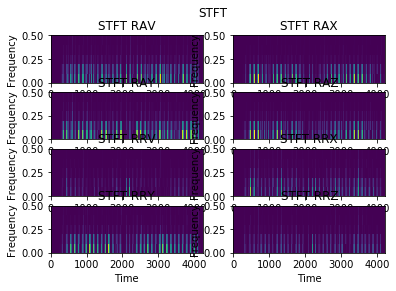

In [15]:
from scipy.signal import stft
datas=get_side_data(data_acquisition(r"C:\Users\Yassine\Desktop\GaitData\10-1.csv"),'right')
data=datas[0]
fig,ax=plt.subplots(4,2)
fig.suptitle('STFT')
names=data.columns
count=0
for i in range(4):
    for j in range(2):
        f, t, Zxx=stft(data.iloc[:,count],nperseg=10)
        ax[i,j].pcolormesh(t, f, np.abs(Zxx))
        ax[i,j].set_title('STFT '+str(names[count]))
        ax[i,j].set_ylabel('Frequency')
        ax[i,j].set_xlabel('Time')
        count=count+1
plt.show()

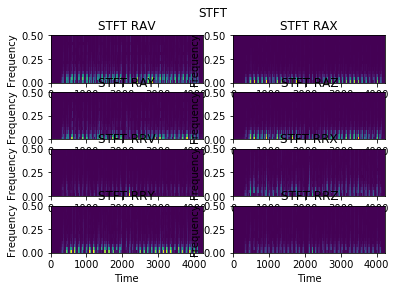

In [16]:
from scipy.signal import stft
datas=get_side_data(data_acquisition(r"C:\Users\Yassine\Desktop\GaitData\10-1.csv"),'right')
data=datas[0]
fig,ax=plt.subplots(4,2)
fig.suptitle('STFT')
names=data.columns
count=0
for i in range(4):
    for j in range(2):
        f, t, Zxx=stft(data.iloc[:,count],nperseg=30)
        ax[i,j].pcolormesh(t, f, np.abs(Zxx))
        ax[i,j].set_title('STFT '+str(names[count]))
        ax[i,j].set_ylabel('Frequency')
        ax[i,j].set_xlabel('Time')
        count=count+1
plt.show()

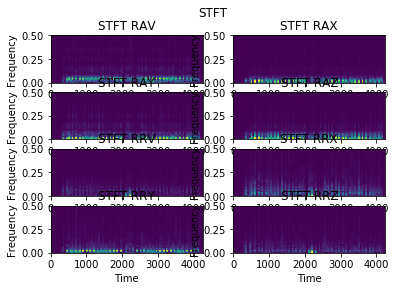

In [18]:
from scipy.signal import stft
datas=get_side_data(data_acquisition(r"C:\Users\Yassine\Desktop\GaitData\10-1.csv"),'right')
data=datas[0]
fig,ax=plt.subplots(4,2)
fig.suptitle('STFT')
names=data.columns
count=0
for i in range(4):
    for j in range(2):
        f, t, Zxx=stft(data.iloc[:,count],nperseg=100)
        ax[i,j].pcolormesh(t, f, np.abs(Zxx))
        ax[i,j].set_title('STFT '+str(names[count]))
        ax[i,j].set_ylabel('Frequency')
        ax[i,j].set_xlabel('Time')
        count=count+1
plt.show()

## PCA

In [23]:
from sklearn.decomposition import PCA
data=data_acquisition(r"C:\Users\Yassine\Desktop\GaitData\10-1.csv")[0]
PCA=PCA(6)
res=PCA.fit(data)
comp=res.components_
print("Principal components")
print(comp)
var=res.explained_variance_ratio_
print("Variance contribution ratio")
print(var)
inert=res.singular_values_
print(inert)
df=res.transform(data)
print("projection of the data on the principal component")
print(df)

Principal components
[[ 2.63457484e-04  3.26320415e-04 -2.64504708e-04  6.47874532e-05
  -1.27852487e-01 -1.62780677e-01 -9.74147784e-01  7.90492330e-02
   1.86335031e-04  7.45153090e-04  4.58746187e-04 -5.85550818e-05
  -3.30398970e-03  2.43330011e-02 -2.80570650e-02 -2.34998224e-02]
 [ 2.63293709e-04  7.72443011e-04 -4.99903565e-04 -9.81741529e-05
   7.19044364e-03 -8.63613382e-03  3.94550107e-02  9.96423868e-03
   3.35058871e-04  1.00315491e-03  6.78491449e-04 -1.68475150e-04
   2.76304091e-02  1.66182895e-01 -9.41415957e-01 -2.89086491e-01]
 [-1.01910574e-03  2.81210890e-04  4.24576822e-04 -1.00894914e-03
  -5.70529312e-01 -4.66059649e-01  1.23900558e-01 -3.71503527e-01
  -3.21376169e-04 -4.67821726e-04 -3.89056454e-04 -6.87455231e-05
   3.77850002e-01  3.26432953e-01 -1.85180988e-03  2.33630411e-01]
 [-4.94585385e-04 -8.11951795e-05  2.50021824e-04 -3.51475286e-04
  -3.78640776e-01 -3.08267111e-01  7.92620657e-02 -2.43367410e-01
   3.80711723e-04  2.53863474e-04  4.35329767e-04  3

## Moving average smoothing

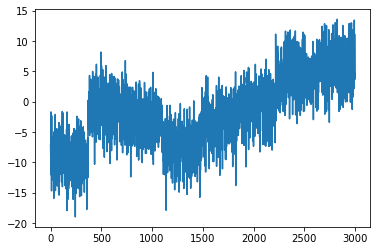

In [43]:
import ruptures as rpt
n = 3000  # number of samples
n_bkps, sigma = 7, 3 # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, 1, n_bkps, noise_std=sigma)
plt.plot(signal)
signal=pd.DataFrame(signal)

In [45]:
res=solve_segmentation_window(signal,10,cost_mld)

running solve_segmentation_window


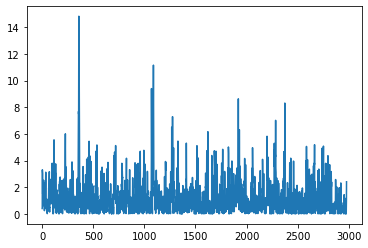

In [52]:
plt.plot(res[0])
cost_smoothed=pd.DataFrame(res[0]).rolling(50).mean()


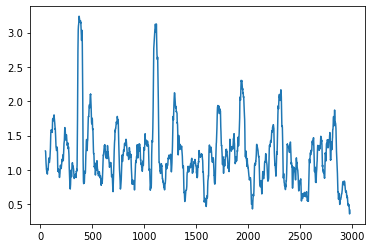

In [53]:
plt.plot(cost_smoothed)